In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow numpy pandas matplotlib

In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import io

for file_name in uploaded.keys():
    with zipfile.ZipFile('/content/Dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('dataset')


In [ ]:
os.listdir('dataset')

['linen', 'cotton', 'silk', 'leather', 'denim', 'velvet']

In [ ]:
from PIL import Image

In [ ]:
# Function to load images and labels into numpy arrays
def load_images_and_labels(dataset_dir):
    images = []
    labels = []
    classes = os.listdir(dataset_dir)
    class_indices = {cls: idx for idx, cls in enumerate(classes)}

    for cls in classes:
        cls_dir = os.path.join(dataset_dir, cls)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            img = Image.open(img_path)
            img = img.resize((150, 150))
            img_array = np.array(img)
            images.append(img_array)
            labels.append(class_indices[cls])

    images = np.array(images) / 255.0  # Normalize images
    labels = np.array(labels)
    return images, labels, class_indices

dataset_dir = 'dataset'
images, labels, class_indices = load_images_and_labels(dataset_dir)

# Convert labels to categorical
labels = tf.keras.utils.to_categorical(labels, num_classes=len(class_indices))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_indices), activation='softmax')  # Number of classes
])
#cnn model is ready and here is cnn model compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,  # You can increase the number of epochs for better results
    validation_data=(X_val, y_val),
    batch_size=32
)


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.8041 - accuracy: 0.2727 - val_loss: 1.8387 - val_accuracy: 0.1667
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.8854 - accuracy: 0.1364 - val_loss: 1.7551 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 1.5582 - accuracy: 0.2727 - val_loss: 1.5536 - val_accuracy: 0.1667
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 1.5142 - accuracy: 0.3636 - val_loss: 1.4118 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 1.3687 - accuracy: 0.6364 - val_loss: 1.3286 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 1.1796 - accuracy: 0.5909 - val_loss: 1.3197 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 1.1251 - accuracy: 0.6364 - val_loss: 1.2172 - val_accuracy: 0.3333
Epoch 8/10
1/1 [=====================

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Loss: {val_loss}')


1/1 [==============================] - 0s 150ms/step - loss: 1.3718 - accuracy: 0.3333
Validation Accuracy: 0.3333333432674408
Validation Loss: 1.3718132972717285


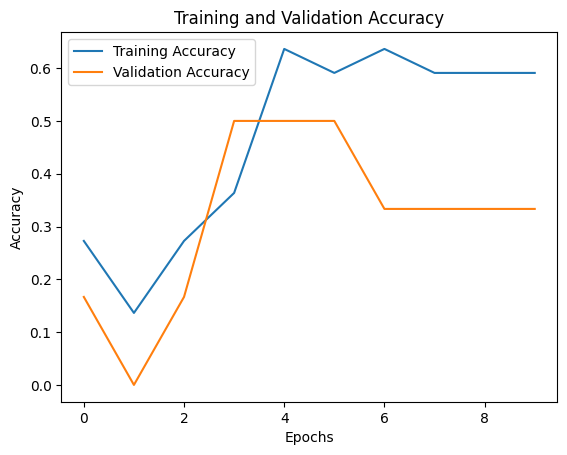

In [ ]:
# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


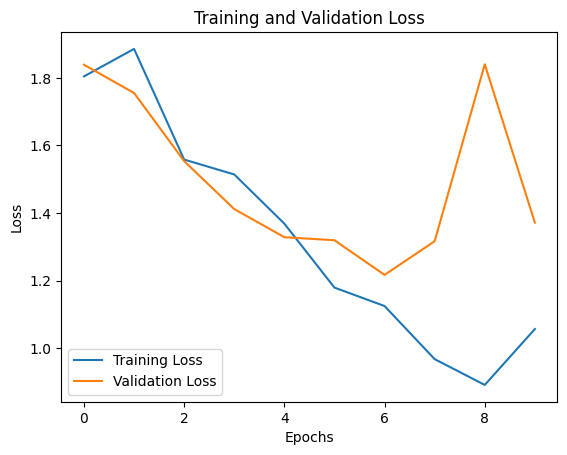

In [ ]:
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Making Predictions on New Images
def predict_image(model, img_path, class_indices):
    img = Image.open(img_path)
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    class_name = list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]

    return class_name, predictions[0][predicted_class]


In [ ]:
# Example prediction
img_path = '/content/denim.78.png'  # Replace with your test image path
predicted_class, confidence = predict_image(model, img_path, class_indices)
print(f'Predicted Class: {predicted_class} with confidence: {confidence:.2f}')

1/1 [==============================] - 0s 53ms/step
Predicted Class: denim with confidence: 0.82
